In [1]:
%run setFormatter.ipynb

In [3]:
Types = {
    "origRGB"   : True,
    "json"      : True,
    "rawBMPs"   : True,
    "CSVfull"   : True,
    "CSVcrop"   : True,
    "CSVspec"   : True,
    "RGBwithPOV": True,
    "BMPwithPOV": True,
}
# sf = SetFormatter('/home/garid/myGithub/spectrumCatcher/spectrumCatcher/tests/20201111', Types)
sf = SetFormatter('/home/garid/myGit/spectrumCatcher/spectrumCatcher/tests/dname1221/13h_', Types)
sf.read_ids(Types, display=True)

origRGB   :unique count: 326
json      :unique count: 326
CSVfull   :unique count: 326
CSVcrop   :unique count: 326
CSVspec   :unique count: 326
RGBwithPOV:unique count: 326
BMPwithPOV:unique count: 326
rawBMPs   :unique count: 326
- incomplete shot: 20191221_111708 has no json
In Given types, 325 unique shots in this Set.


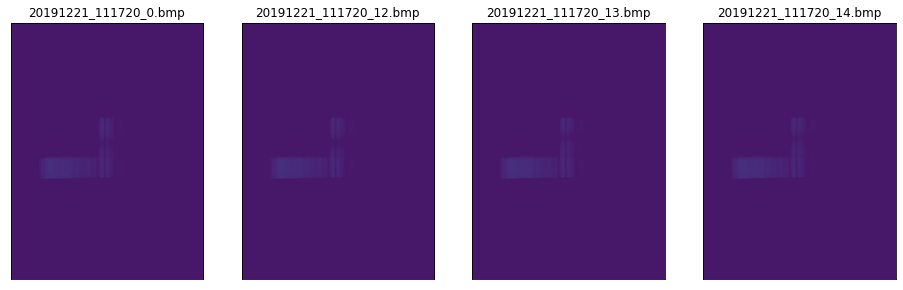

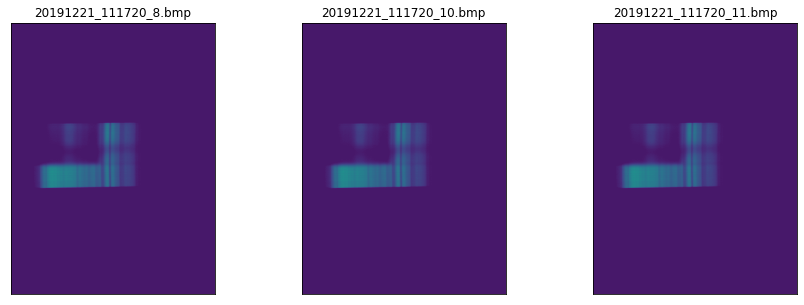

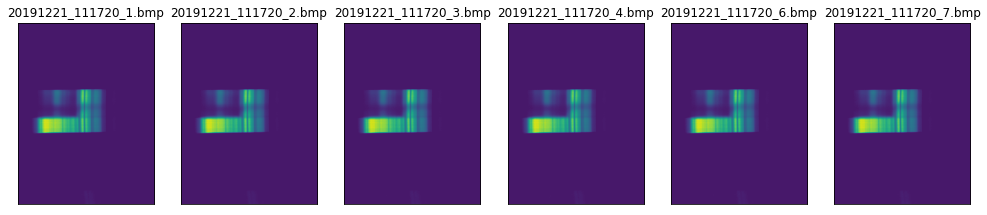

In [4]:
# sf.cleanFiles()
shotsIndex = 70
shotsIndex = 6
# shotsIndex = 153
# sf.shots[shotsIndex].clustering()
sf.shots[shotsIndex].showBMPs(SingleShot.ExpShort)
sf.shots[shotsIndex].showBMPs(SingleShot.ExpMedium)
sf.shots[shotsIndex].showBMPs(SingleShot.ExpLonger)

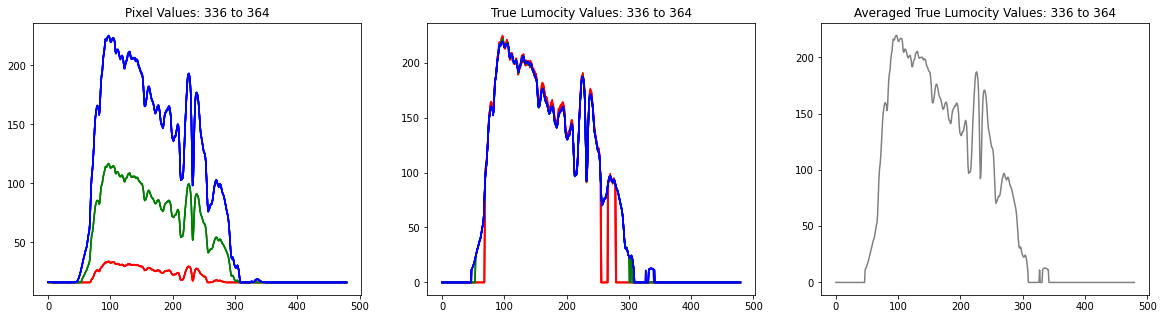

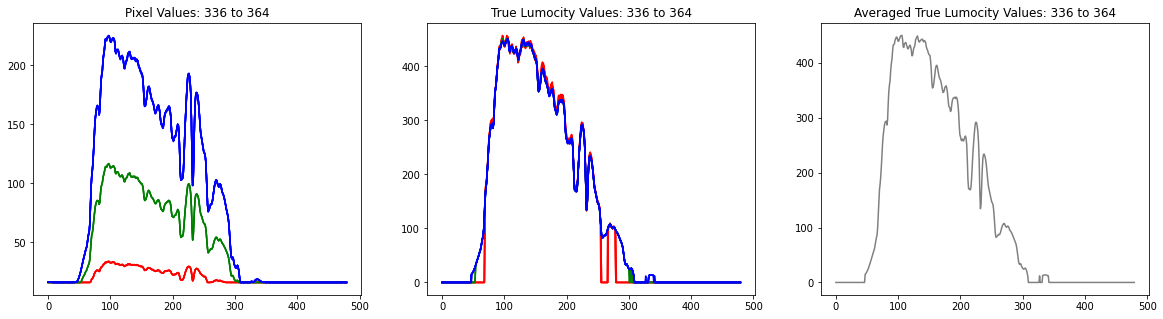

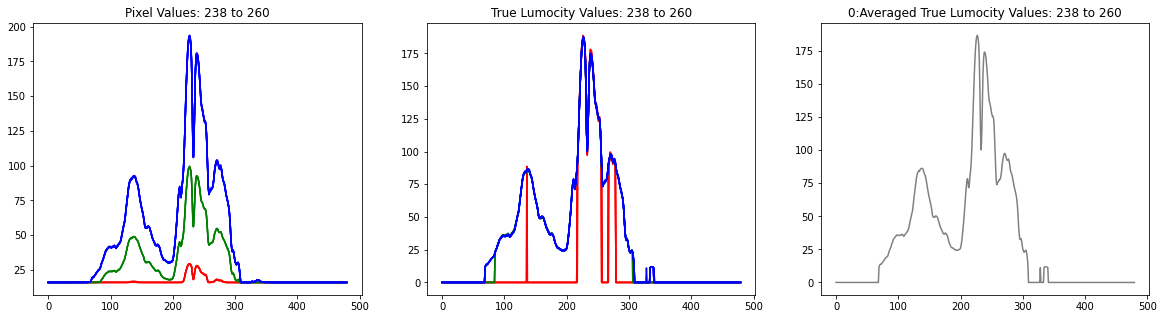

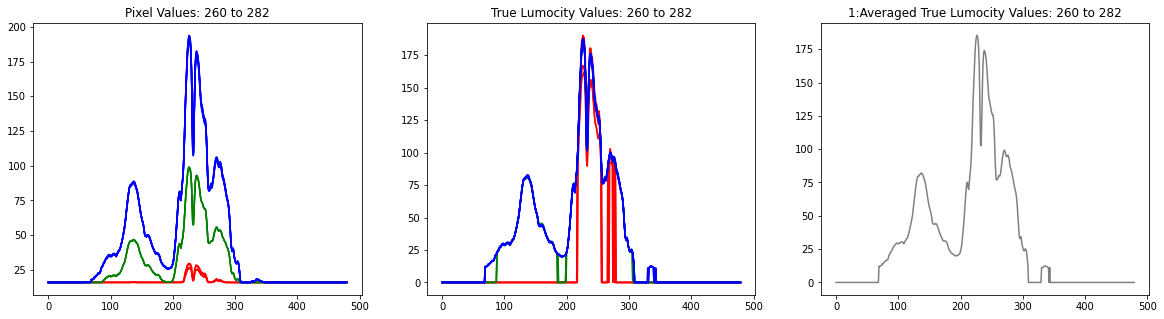

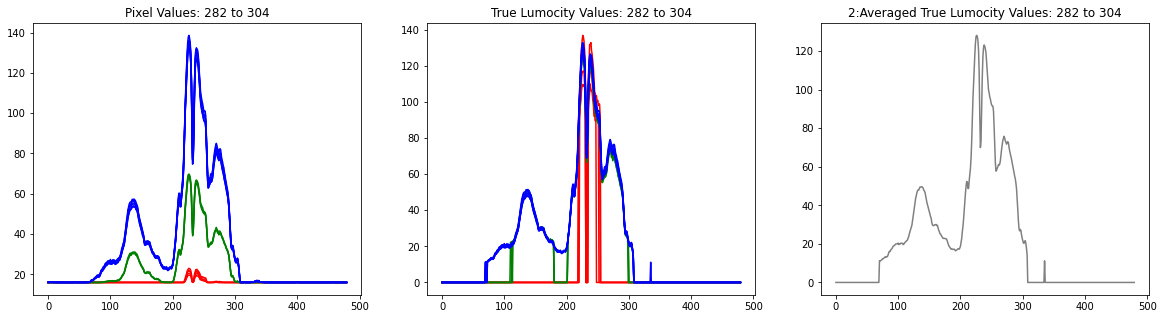

In [5]:
sf.shots[shotsIndex].readGray(display = True)
sf.shots[shotsIndex].readWhite(display = True)
sf.shots[shotsIndex].readLeaf(numSection = 3, display = True)
_ = sf.shots[shotsIndex].readReflection(display = False)

# 1. Rotation angleangle
##  1.1 Getting the lower edge angle

In [6]:
shotsIndex = 60
img = np.rot90(imageio.imread(sf.shots[shotsIndex].fnameBMP_8Exposure[0]), k = 3)

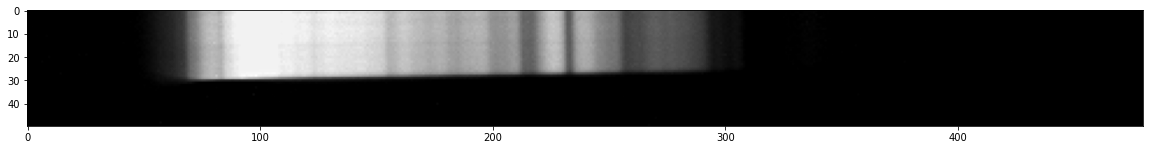

In [7]:
plt.figure(figsize = (20,10))
plt.imshow(img[360:410,:], 'gray')

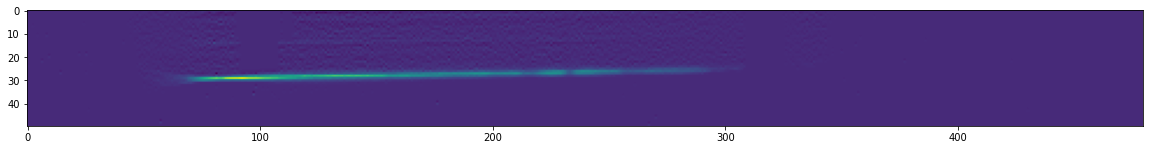

In [8]:
plt.figure(figsize = (20,10))
lower_0shift = np.copy(img[360:410,:]).astype(np.int)
lower_1shift = np.copy(img[360+1:410+1,:]).astype(np.int)
lower_diff = lower_0shift - lower_1shift
plt.imshow(lower_diff, vmax = np.max(lower_diff), vmin = np.min(lower_diff))

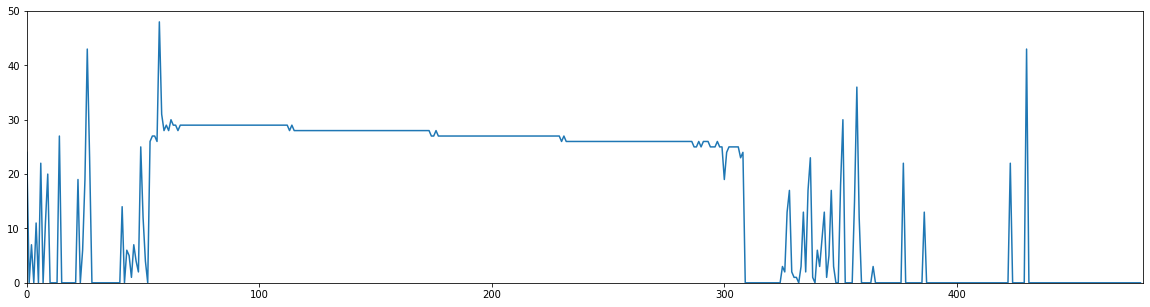

In [9]:
plt.figure(figsize = (20,5))
lowerArgmax = np.argmax(lower_diff, axis = 0)
plt.xlim(0,480)
plt.ylim(0,50)
plt.plot(lowerArgmax)

(0.0, 50.0)

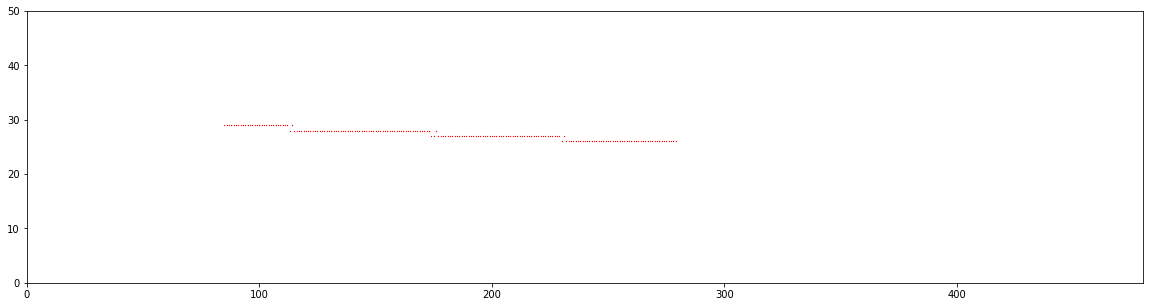

In [10]:
plt.figure(figsize = (20,5))
lowerArgmax = np.argmax(lower_diff, axis = 0)
# xwavelimit0 = 70
# xwavelimit1 = 300
xwavelimit0 = 85
xwavelimit1 = 280
plt.scatter(np.arange(xwavelimit0,xwavelimit1,1), lowerArgmax[xwavelimit0:xwavelimit1], s = .1, marker ='x', color=  'r')
plt.xlim(0,480)
plt.ylim(0,50)


slope of the line:              -0.017325090226415707 which is: -0.9925552495564514 deg
slope of the intercepting 0 at: 30.512140780182015


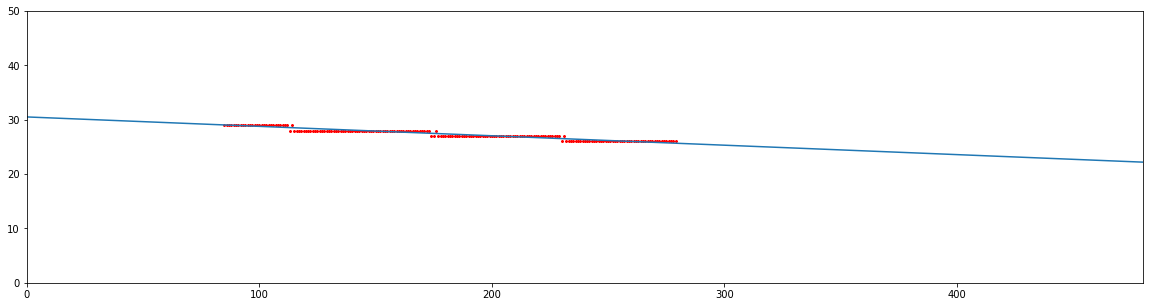

In [11]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(xwavelimit0,xwavelimit1,1), lowerArgmax[xwavelimit0:xwavelimit1])
print("slope of the line:             ", slope, "which is:", np.arctan(slope)*180/np.pi, "deg")
print("slope of the intercepting 0 at:", intercept)

plt.figure(figsize = (20,5))
lowerArgmax = np.argmax(lower_diff, axis = 0)
# xwavelimit0 = 70
# xwavelimit1 = 300
# xwavelimit0 = 85
# xwavelimit1 = 280
plt.scatter(np.arange(xwavelimit0,xwavelimit1,1), lowerArgmax[xwavelimit0:xwavelimit1], s = 4, marker ='x', color=  'r')
plt.xlim(0,480)
plt.ylim(0,50)

plt.plot([0,480], [intercept, intercept + slope * 480])


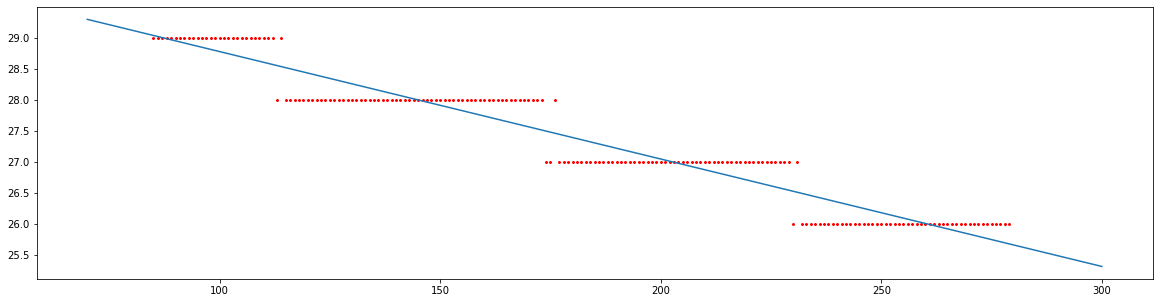

In [12]:
plt.figure(figsize = (20,5))
lowerArgmax = np.argmax(lower_diff, axis = 0)
# xwavelimit0 = 70
# xwavelimit1 = 300
# xwavelimit0 = 85
# xwavelimit1 = 280
plt.scatter(np.arange(xwavelimit0,xwavelimit1,1), lowerArgmax[xwavelimit0:xwavelimit1], s = 4, marker ='x', color=  'r')


plt.plot([70,300], [intercept + slope * 70, intercept + slope * 300])


##  1.2 Getting the upper edge angle

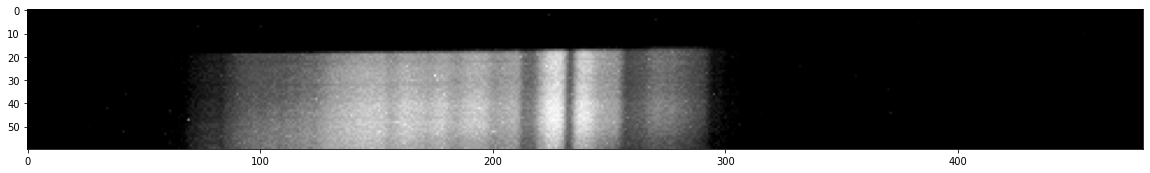

In [13]:
plt.figure(figsize = (20,10))
plt.imshow(img[220:280,:], 'gray')

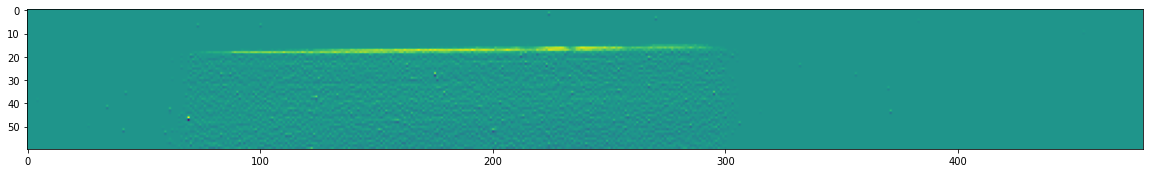

In [14]:
plt.figure(figsize = (20,10))
upper_0shift = np.copy(img[220:280,:]).astype(np.int)
upper_1shift = np.copy(img[220+1:280+1,:]).astype(np.int)
upper_diff = upper_1shift - upper_0shift
plt.imshow(upper_diff, vmax = np.max(upper_diff), vmin = np.min(upper_diff))

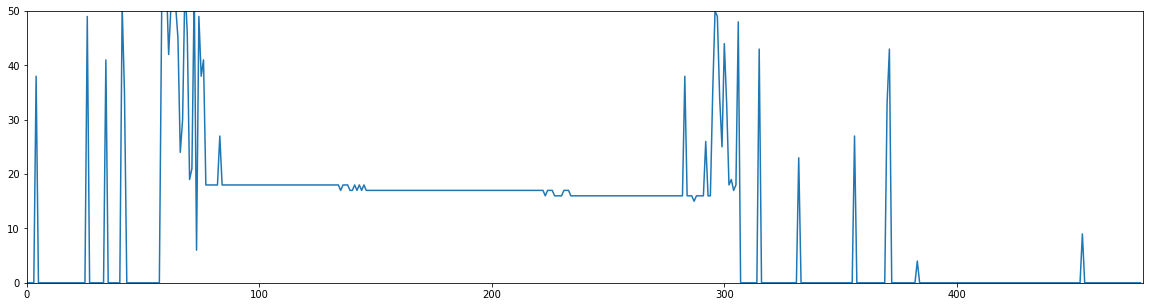

In [15]:
plt.figure(figsize = (20,5))
upperArgmax = np.argmax(upper_diff, axis = 0)
plt.xlim(0,480)
plt.ylim(0,50)
plt.plot(upperArgmax)

(0.0, 50.0)

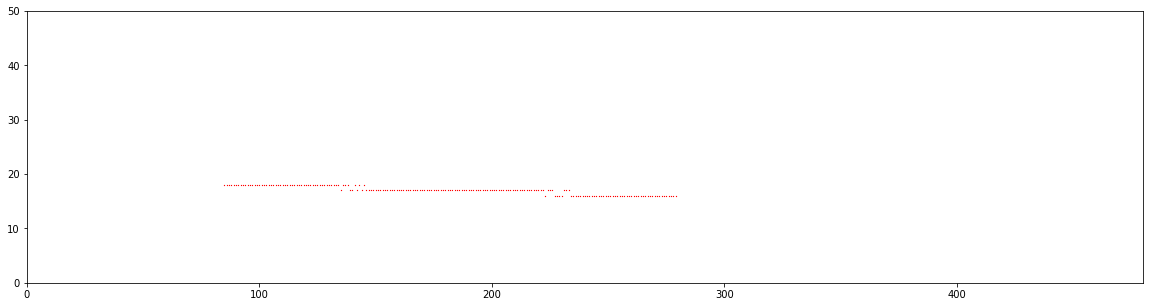

In [16]:
plt.figure(figsize = (20,5))
upperArgmax = np.argmax(upper_diff, axis = 0)
xwavelimit0 = 85
xwavelimit1 = 280
plt.scatter(np.arange(xwavelimit0,xwavelimit1,1), upperArgmax[xwavelimit0:xwavelimit1], s = .1, marker ='x', color=  'r')
plt.xlim(0,480)
plt.ylim(0,50)


slope of the line:              -0.012188253572642381 which is: -0.6983009123632963 deg
slope of the intercepting 0 at: 19.243903175861938


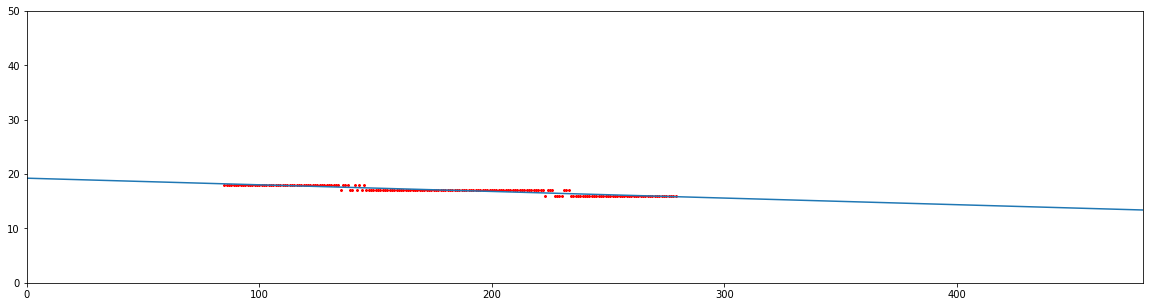

In [17]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(xwavelimit0,xwavelimit1,1), upperArgmax[xwavelimit0:xwavelimit1])
print("slope of the line:             ", slope, "which is:", np.arctan(slope)*180/np.pi, "deg")
print("slope of the intercepting 0 at:", intercept)

plt.figure(figsize = (20,5))
plt.scatter(np.arange(xwavelimit0,xwavelimit1,1), upperArgmax[xwavelimit0:xwavelimit1], s = 4, marker ='x', color=  'r')
plt.xlim(0,480)
plt.ylim(0,50)

plt.plot([0,480], [intercept, intercept + slope * 480])


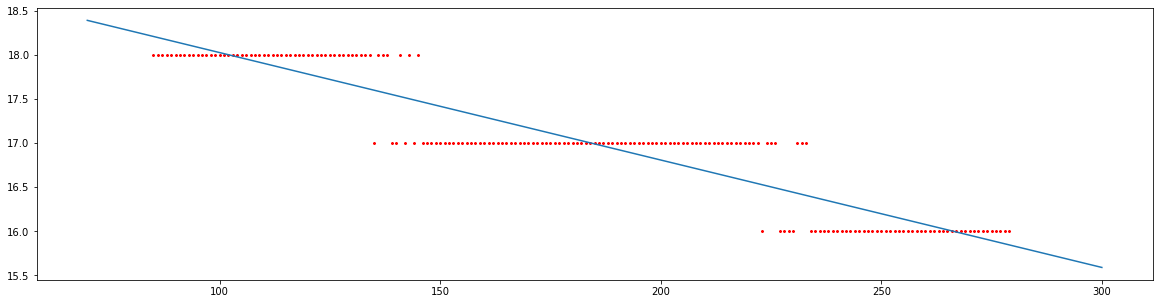

In [18]:
plt.figure(figsize = (20,5))
plt.scatter(np.arange(xwavelimit0,xwavelimit1,1), upperArgmax[xwavelimit0:xwavelimit1], s = 4, marker ='x', color=  'r')
plt.plot([70,300], [intercept + slope * 70, intercept + slope * 300])


# 1. Rotation angleangle
## 1.3 Running on all 325 images


In [19]:
xwavelimit0 = 85
xwavelimit1 = 280
allLowerSlope = np.zeros((325,1))
allUpperSlope = np.zeros((325,1))

for i in range(325):
    shotsIndex = i
    img = np.rot90(imageio.imread(sf.shots[shotsIndex].fnameBMP_8Exposure[0]), k = 3)

    lower_0shift = np.copy(img[360:410,:]).astype(np.int)
    lower_1shift = np.copy(img[360+1:410+1,:]).astype(np.int)
    lower_diff = lower_0shift - lower_1shift
    lowerArgmax = np.argmax(lower_diff, axis = 0)
    lowerslope, lowerintercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(xwavelimit0,xwavelimit1,1), lowerArgmax[xwavelimit0:xwavelimit1])

    upper_0shift = np.copy(img[220:280,:]).astype(np.int)
    upper_1shift = np.copy(img[220+1:280+1,:]).astype(np.int)
    upper_diff = upper_1shift - upper_0shift
    upperArgmax = np.argmax(upper_diff, axis = 0)
    upperslope, upperintercept, r_value, p_value, std_err = scipy.stats.linregress(np.arange(xwavelimit0,xwavelimit1,1), upperArgmax[xwavelimit0:xwavelimit1])
    
    allLowerSlope[i,0] = lowerslope
    allUpperSlope[i,0] = upperslope

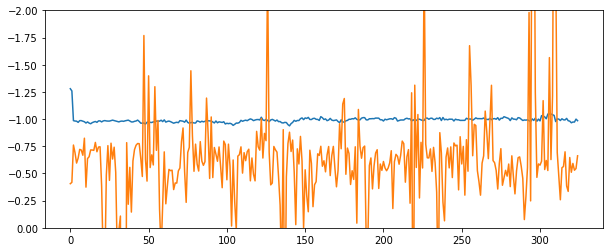

In [20]:
plt.figure(figsize= (10,4))
plt.ylim(0,-2)
plt.plot(allLowerSlope[:] * 180/ np.pi)
plt.plot(allUpperSlope[:] * 180/ np.pi)

average lower edge slope in deg:  -0.9909189645240537
average upper edge slope in deg:  -0.6017607191749855


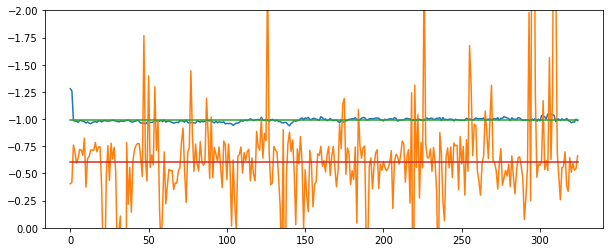

In [21]:
plt.figure(figsize= (10,4))
plt.ylim(0,-2)
plt.plot(allLowerSlope[:] * 180/ np.pi)
plt.plot(allUpperSlope[:] * 180/ np.pi)
lowerAveSlope = np.mean(allLowerSlope)*180/np.pi
upperAveSlope = np.mean(allUpperSlope)*180/np.pi
plt.plot([0,324], [lowerAveSlope, lowerAveSlope])
plt.plot([0,324], [upperAveSlope, upperAveSlope])
print("average lower edge slope in deg: ", lowerAveSlope)
print("average upper edge slope in deg: ", upperAveSlope)

# 1. Rotation angleangle
## 1.4 Actual Rotation of BMP img

In [23]:
import numpy as np
import cv2
import math
import copy

def warpAffine(src, M, dsize, from_bounding_box_only=False):
    """
    Applies cv2 warpAffine, marking transparency if bounding box only
    The last of the 4 channels is merely a marker. It does not specify opacity in the usual way.
    """
    return cv2.warpAffine(src, M, dsize)

def rotate_image(image, angle):
    """Rotate the image counterclockwise.
    Rotate the image such that the rotated image is enclosed inside the
    tightest rectangle. The area not occupied by the pixels of the original
    image is colored black.
    Parameters
    ----------
    image : numpy.ndarray
        numpy image
    angle : float
        angle by which the image is to be rotated. Positive angle is
        counterclockwise.
    Returns
    -------
    numpy.ndarray
        Rotated Image
    """
    # get dims, find center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # perform the actual rotation and return the image
    image = warpAffine(image, M, (nW, nH), False)

    # image = cv2.resize(image, (w,h))

    return image


In [24]:
angle = (lowerAveSlope + upperAveSlope)/2
print("Rotate {} degrees".format(angle))

Rotate -0.7963398418495196 degrees


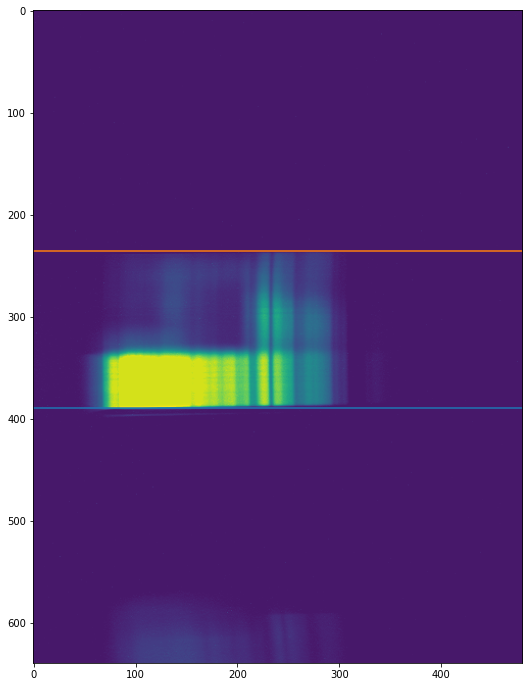

In [25]:
plt.figure(figsize= (16,12))
plt.imshow(img, vmax=255, vmin=0)
plt.plot([0,479], [390,390])
plt.plot([0,479], [235,235])

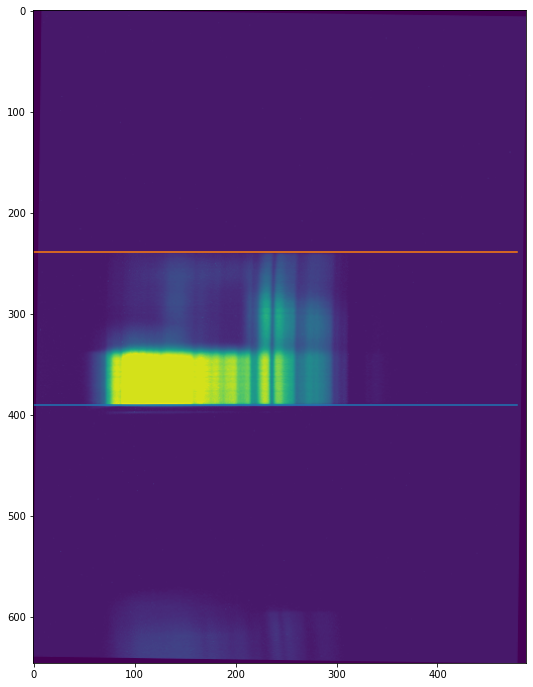

In [26]:
rotated_img = rotate_image(img, angle)
plt.figure(figsize= (16,12))
plt.imshow(rotated_img, vmax=255, vmin=0)

plt.plot([0,479], [390,390])
plt.plot([0,479], [239,239])


## Fraunhofer line in raw BMP (not rotated)


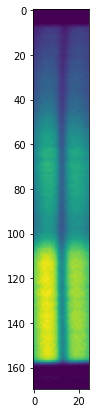

In [27]:
plt.figure(figsize= (1,12))

plt.imshow(img[230:400,220:245])
plt.show()

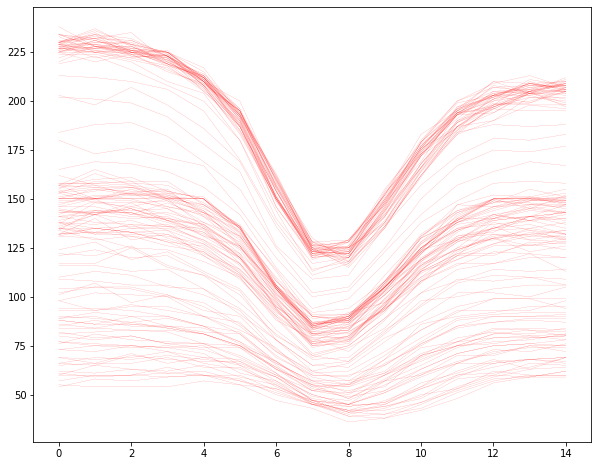

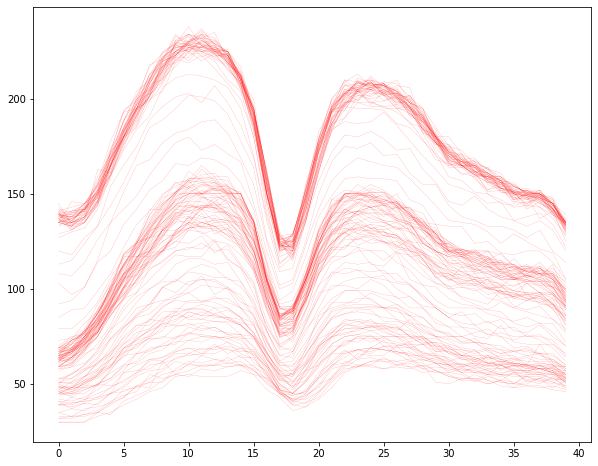

In [28]:
plt.figure(figsize= (10,8))

for i in range(240, 380):
    plt.plot(img[i,225:240], 'r', linewidth = .1)
plt.show()

plt.figure(figsize= (10,8))
for i in range(240, 380):
    plt.plot(img[i,215:255], 'r', linewidth = .1)
    
    

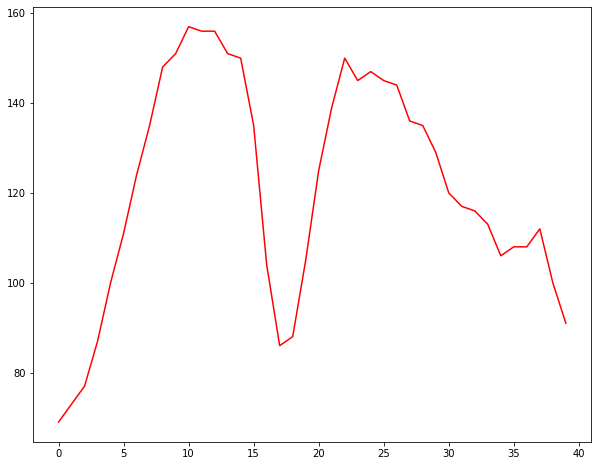

In [29]:
plt.figure(figsize= (10,8))
plt.plot( img[295,215:255],  c= 'r')

## Fraunhofer line rotated BMP


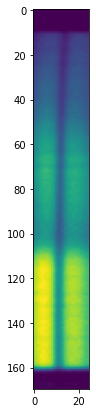

In [30]:
plt.figure(figsize= (1,12))

plt.imshow(rotated_img[230:400,225:250])
plt.show()

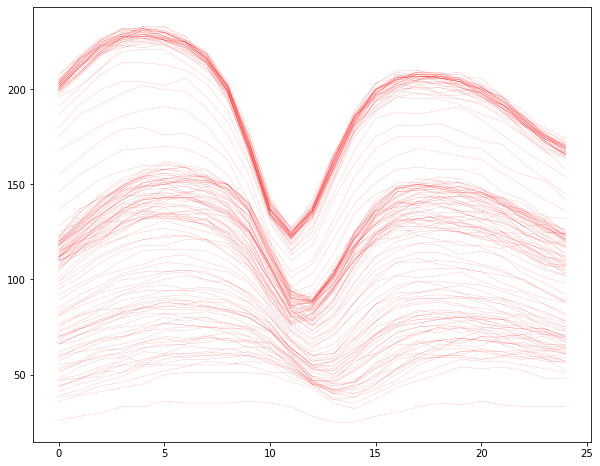

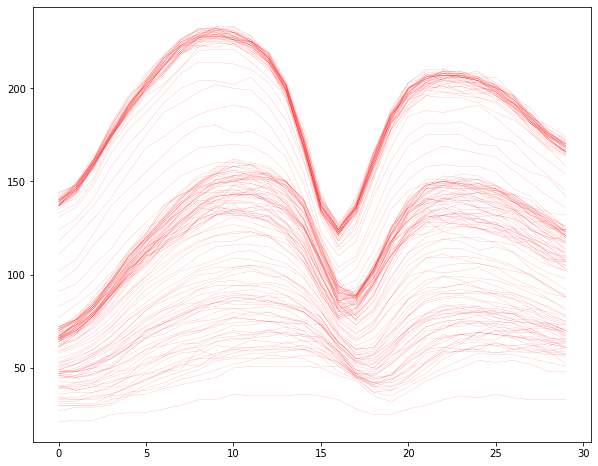

In [31]:
plt.figure(figsize= (10,8))

for i in range(240, 380):
    plt.plot(rotated_img[i,225:250], 'r', linewidth = .1)
plt.show()

plt.figure(figsize= (10,8))
for i in range(240, 380):
    plt.plot(rotated_img[i,220:250], 'r', linewidth = .1)
    
    

## Skew normal distribution

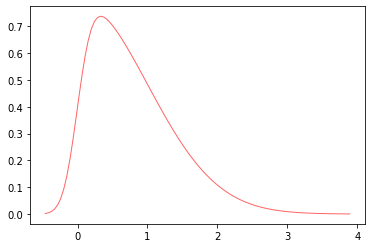

In [32]:
from scipy.stats import skewnorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
a = 6
# mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
x = np.linspace(skewnorm.ppf(0.0001, a),
                skewnorm.ppf(0.9999, a), 100)
ax.plot(x, skewnorm.pdf(x, a),
       'r-', lw=1, alpha=0.6, label='skewnorm pdf')

In [33]:
skewnorm.ppf(0.0001, a)

-0.46080670322129247

In [34]:
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')
mean, var, skew, kurt

(array(0.78702848), array(0.38058617), array(0.89115917), array(0.7501127))

In [35]:
skewnorm.ppf(0.9999, a)

3.890591886413202

In [36]:
x = np.arange(-4, 4, .01)

In [37]:
def normalFunction(a):
    return np.exp(-a*a/2)/np.sqrt(2)/np.pi


def sumNormalFucntion(a):
    normalF = normalFunction(a)
    snf = np.zeros((a.shape[0]))
    summa = 0
    for i in range(a.shape[0]):
        snf[i] = np.sum(normalF[:i])
    return snf

def skewNormFunction(a, alpha):
    normalF = normalFunction(a)
    snormal = sumNormalFucntion(a * alpha)
    sadf    = np.zeros((a.shape[0]))
    for i in range(a.shape[0]):
        sadf[i] = 2 * normalF[i] * np.sum(normalF[:i])
    return sadf

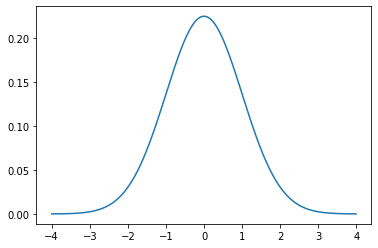

In [38]:
plt.plot(x, normalFunction(x))

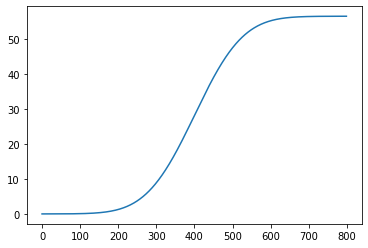

In [39]:
plt.plot(sumNormalFucntion(x))

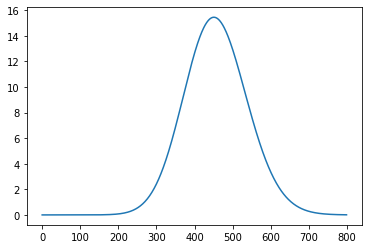

In [40]:
plt.plot(skewNormFunction(x, 7))

In [43]:
skewNormFunction(x, 7)[300:800] + skewNormFunction(x, 1/7)[100:]

ValueError: operands could not be broadcast together with shapes (500,) (700,) 

Something estrange

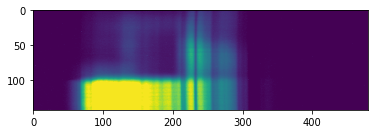

In [56]:
image = img[237:380,:]
plt.imshow(image)

In [70]:
def argmin_from_to(arr, x0, x1):
    return x0 + np.argmin(arr[x0:x1])
def argmax_from_to(arr, x0, x1):
    return x0 + np.argmax(arr[x0:x1])

In [90]:
init = 233
halfWindow = 6
alines = np.zeros((143,1), dtype = np.int)
alines[0,0] = argmin_from_to(image[0,:], init-halfWindow, init+halfWindow)
for i in range(0,143-1):
    alines[i+1,0] = argmin_from_to(image[i,:], alines[i,0]-halfWindow, alines[i,0]+halfWindow)

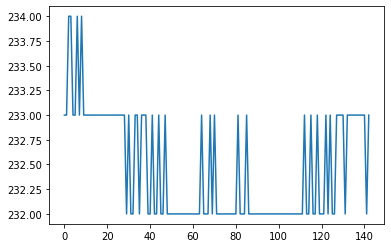

In [91]:
plt.plot(alines)

In [92]:
argmin_from_to(image[i,:], 216, 228)

216

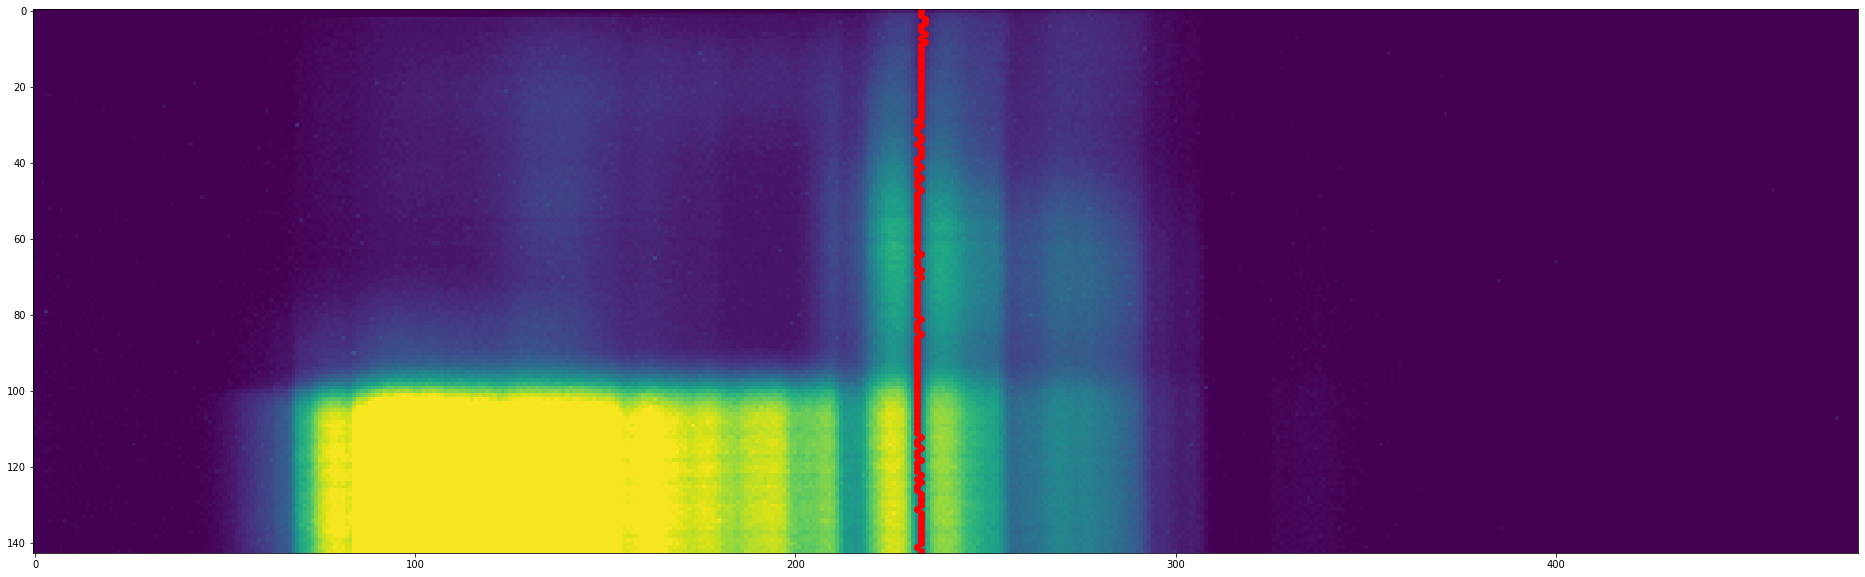

In [95]:
plt.figure(figsize = (40,10))
image = img[237:380,:]
plt.imshow(image)
plt.scatter(alines, np.arange(380-237), color = 'red')

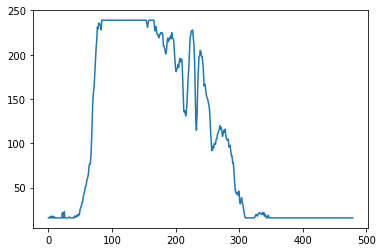

In [97]:
plt.plot(image[-1,:])

In [99]:
from scipy.signal import argrelextrema
lmaxima = argrelextrema(image[-1,:], np.greater)

lminima = argrelextrema(image[-1,:], np.less)


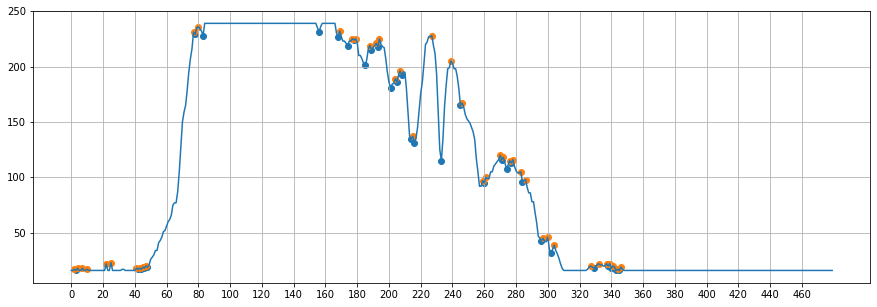

In [115]:
plt.figure(figsize = (15,5))

plt.plot(image[-1,:])
plt.scatter(lminima, image[-1,lminima])
plt.scatter(lmaxima, image[-1,lmaxima])
plt.xticks(np.arange(0,480,20))
plt.grid("on")

In [116]:
lminima

(array([  3,  42,  44,  46,  48,  78,  83, 156, 168, 174, 178, 185, 189,
        193, 201, 205, 208, 214, 216, 233, 245, 260, 271, 274, 277, 284,
        296, 302, 329, 338, 340, 343, 345]),)

In [117]:
lmaxima

(array([  2,   4,   7,  10,  22,  25,  41,  43,  45,  47,  77,  80, 169,
        177, 179, 188, 192, 194, 204, 207, 215, 227, 239, 246, 259, 261,
        270, 272, 276, 278, 283, 286, 297, 300, 304, 327, 332, 337, 339,
        341, 344, 346]),)

In [119]:
localMinimas = [215,233,260] 
localMaximas = [227,239,270] 

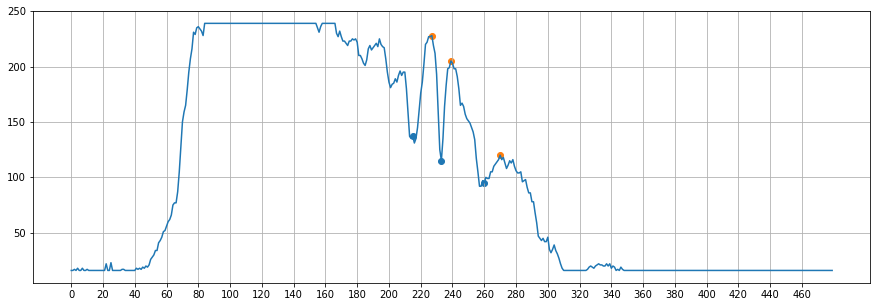

In [120]:
plt.figure(figsize = (15,5))

plt.plot(image[-1,:])
plt.scatter(localMinimas, image[-1,localMinimas])
plt.scatter(localMaximas, image[-1,localMaximas])
plt.xticks(np.arange(0,480,20))
plt.grid("on")

In [135]:
halfWindow = 3
alines_min = np.zeros((143,3), dtype = np.int)
alines_min[-1,0] = localMinimas[0]
alines_min[-1,1] = localMinimas[1]
alines_min[-1,2] = localMinimas[2]
alines_max = np.zeros((143,3), dtype = np.int)
alines_max[-1,0] = localMaximas[0]
alines_max[-1,1] = localMaximas[1]
alines_max[-1,2] = localMaximas[2]
for j in range(3):
    print(j)
    for i in range(142, 1,-1):
        print(i, alines_min[i,j]-halfWindow, alines_min[i,j]+halfWindow)
        alines_min[i-1,j] = argmin_from_to(image[i,:], alines_min[i,j]-halfWindow, alines_min[i,j]+halfWindow)
        alines_max[i-1,j] = argmax_from_to(image[i,:], alines_max[i,j]-halfWindow, alines_max[i,j]+halfWindow)

0
142 212 218
141 213 219
140 213 219
139 213 219
138 212 218
137 213 219
136 212 218
135 213 219
134 213 219
133 211 217
132 213 219
131 213 219
130 213 219
129 211 217
128 212 218
127 213 219
126 212 218
125 213 219
124 213 219
123 212 218
122 213 219
121 211 217
120 213 219
119 213 219
118 210 216
117 211 217
116 211 217
115 211 217
114 212 218
113 210 216
112 212 218
111 210 216
110 210 216
109 211 217
108 213 219
107 213 219
106 212 218
105 210 216
104 211 217
103 211 217
102 210 216
101 210 216
100 211 217
99 210 216
98 210 216
97 211 217
96 210 216
95 210 216
94 210 216
93 210 216
92 209 215
91 210 216
90 209 215
89 209 215
88 209 215
87 210 216
86 209 215
85 209 215
84 210 216
83 209 215
82 210 216
81 211 217
80 209 215
79 209 215
78 210 216
77 209 215
76 209 215
75 210 216
74 210 216
73 209 215
72 209 215
71 210 216
70 210 216
69 210 216
68 210 216
67 209 215
66 209 215
65 209 215
64 209 215
63 209 215
62 209 215
61 210 216
60 209 215
59 210 216
58 210 216
57 210 216
56 210 21

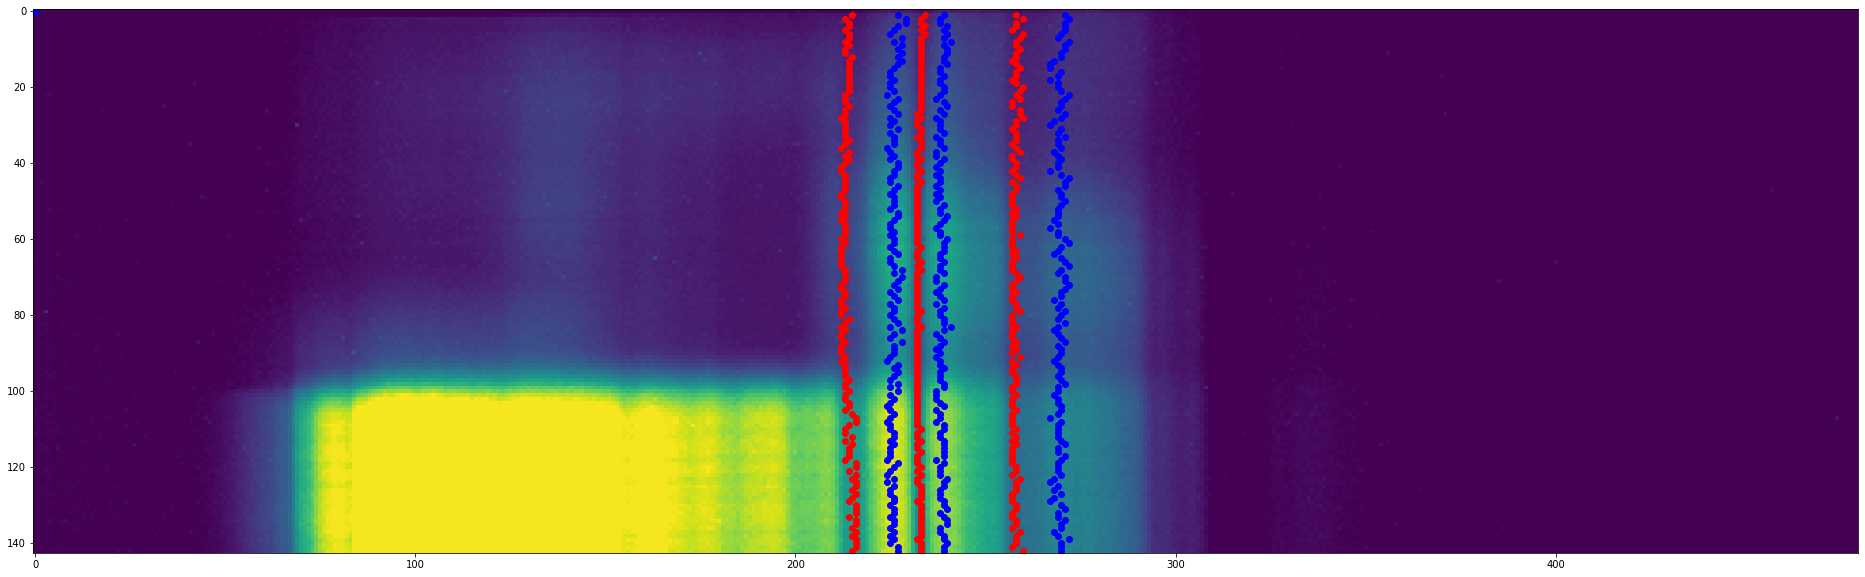

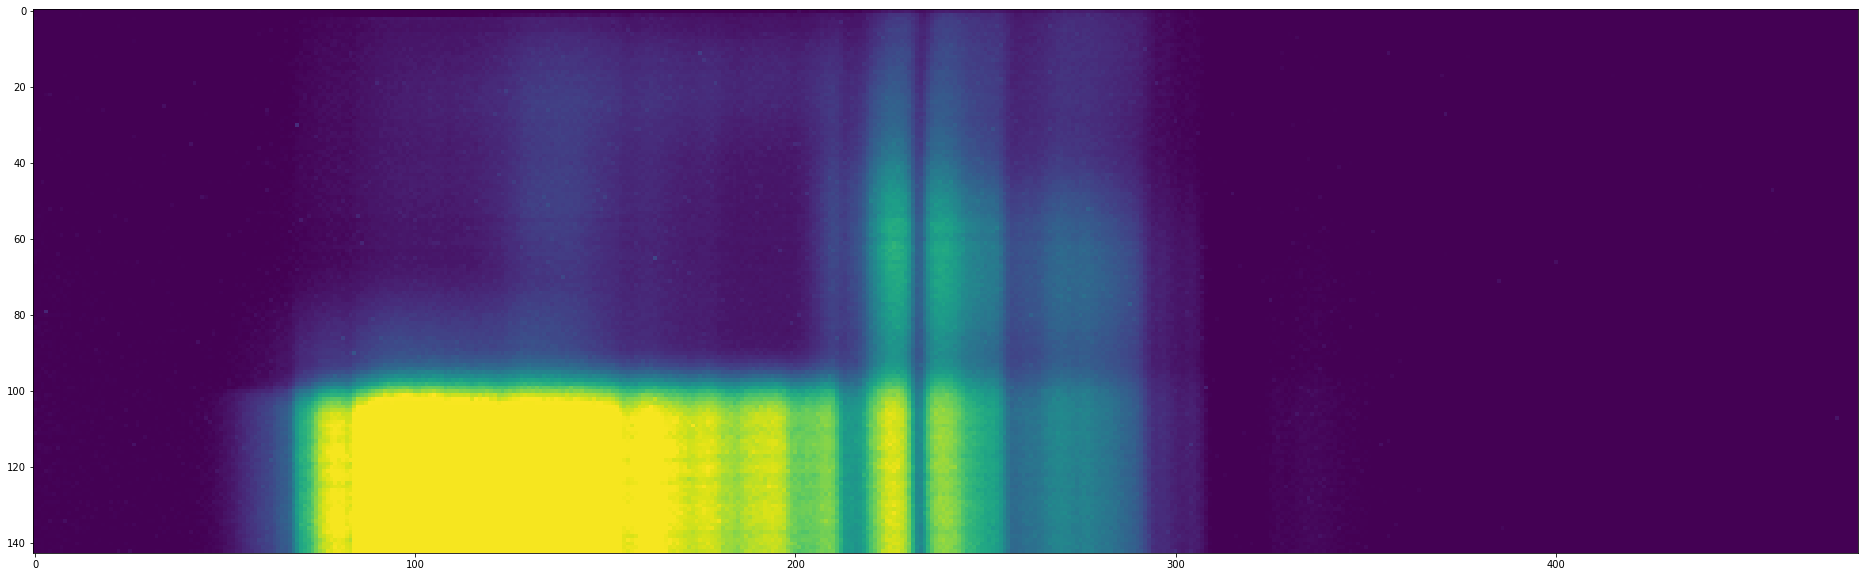

In [170]:
plt.figure(figsize = (40,10))
image = img[237:380,:]
plt.imshow(image)
plt.scatter(alines_min[:,0], np.arange(380-237), color = 'red')
plt.scatter(alines_min[:,1], np.arange(380-237), color = 'red')
plt.scatter(alines_min[:,2], np.arange(380-237), color = 'red')

plt.scatter(alines_max[:,0], np.arange(380-237), color = 'blue')
plt.scatter(alines_max[:,1], np.arange(380-237), color = 'blue')
plt.scatter(alines_max[:,2], np.arange(380-237), color = 'blue')
plt.show()

plt.figure(figsize = (40,10))
plt.imshow(image)

In [141]:
x = np.sum(alines_min, axis = 1) + np.sum(alines_max, axis = 1) 

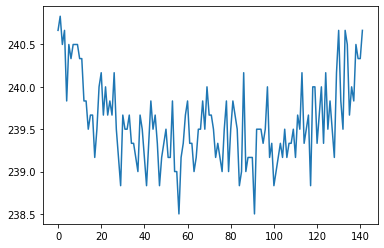

In [146]:
plt.plot(x[1:]/6)

In [163]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


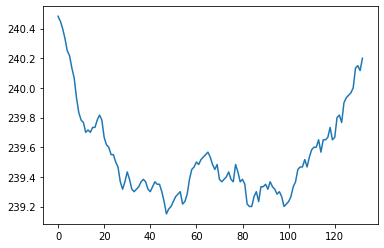

In [169]:
plt.plot(moving_average(x[1:]/6, 10))

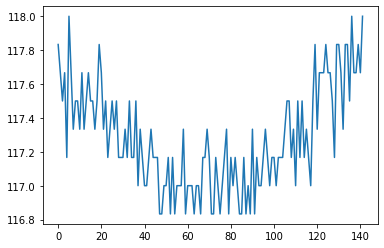

In [171]:
x = np.sum(alines_min, axis = 1) 
plt.plot(x[1:]/6)

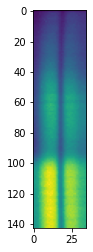

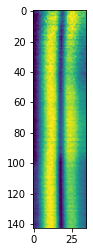

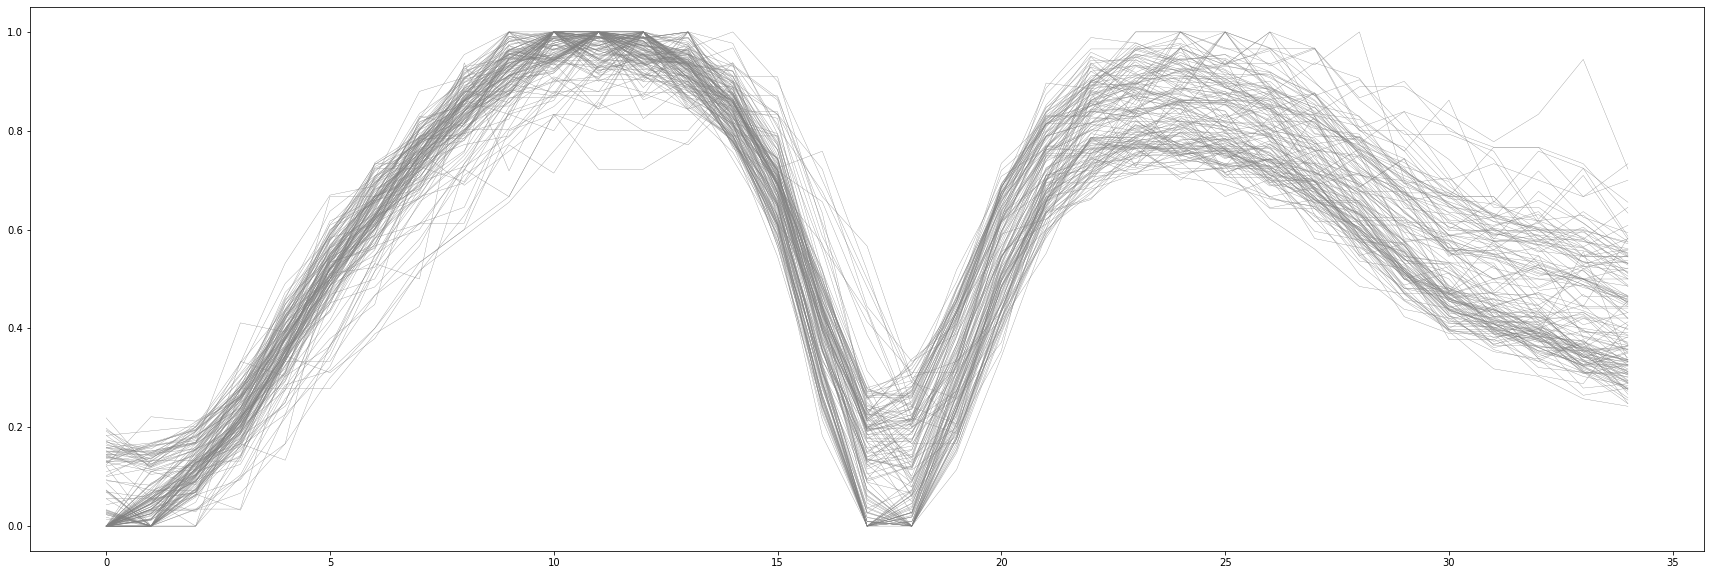

In [205]:
def absolute(asdf):
    tmp = np.copy(asdf) - np.min(asdf, axis = 1).reshape(asdf.shape[0], 1)
    return tmp / np.max(tmp, axis =1 ).reshape(tmp.shape[0], 1)

plt.imshow(img[237:380,215:250])
plt.show()
plt.imshow(absolute(img[237:380,215:250]))
plt.show()

def shapes(asdf):
    plt.figure(figsize = (30,10))
    for i in range(asdf.shape[0]):
        plt.plot(asdf[i, :], 'gray', linewidth = 0.3)
shapes(absolute(img[237:380,215:250]))
#215:250
#225:240
#215:260

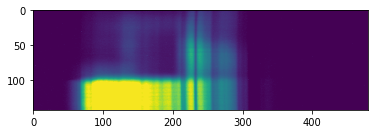

In [206]:
plt.imshow(image)

In [215]:
def locallyNormalizedIamge(arr, halfWindowSize = 5):
    asdf = np.zeros((arr.shape[0], arr.shape[1]))
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            lWindowPos = (j-halfWindowSize) * ((j-halfWindowSize) > 0 )
            rWindowPos = (j+halfWindowSize) * ((j-halfWindowSize) < arr.shape[1])
            minVal_inWindow = np.min(arr[i, lWindowPos:rWindowPos])#, axis = 1)
            maxVal_inWindow = np.max(arr[i, lWindowPos:rWindowPos])#, axis = 1)
            if (minVal_inWindow == maxVal_inWindow):
                asdf[i, j] = 0
            else:
                asdf[i, j] = (arr[i,j] - minVal_inWindow) / (maxVal_inWindow - minVal_inWindow)

    return asdf

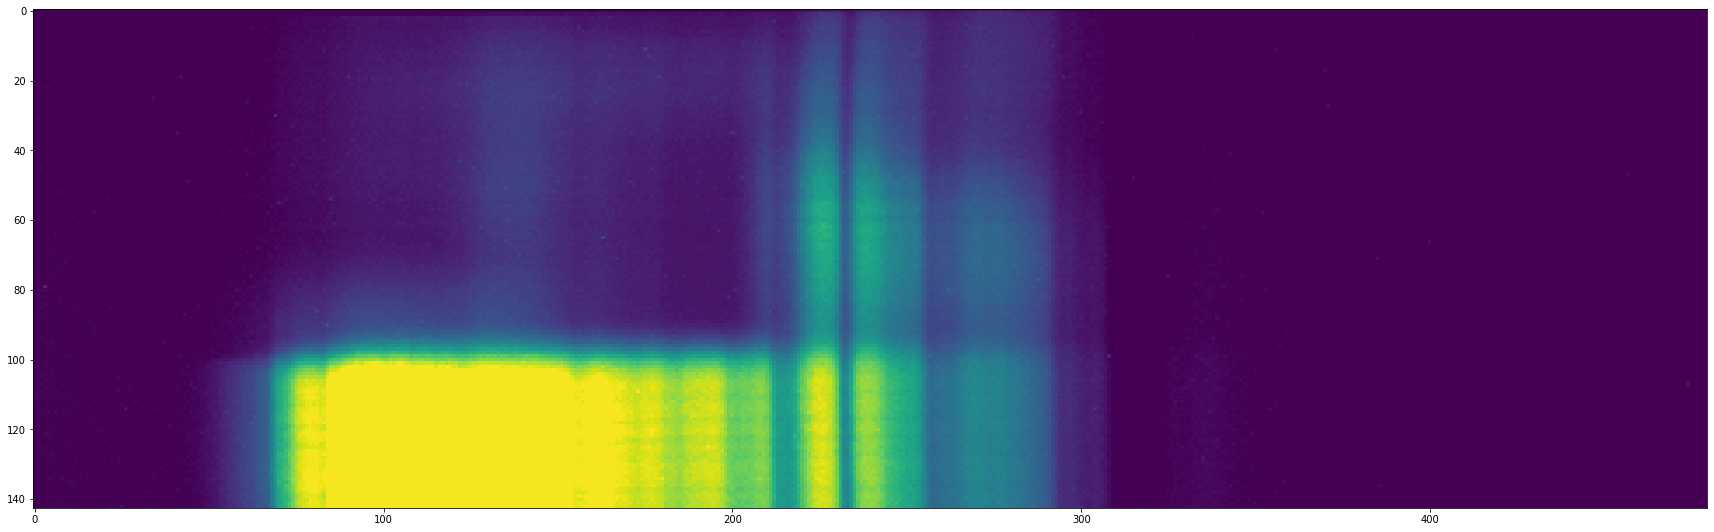

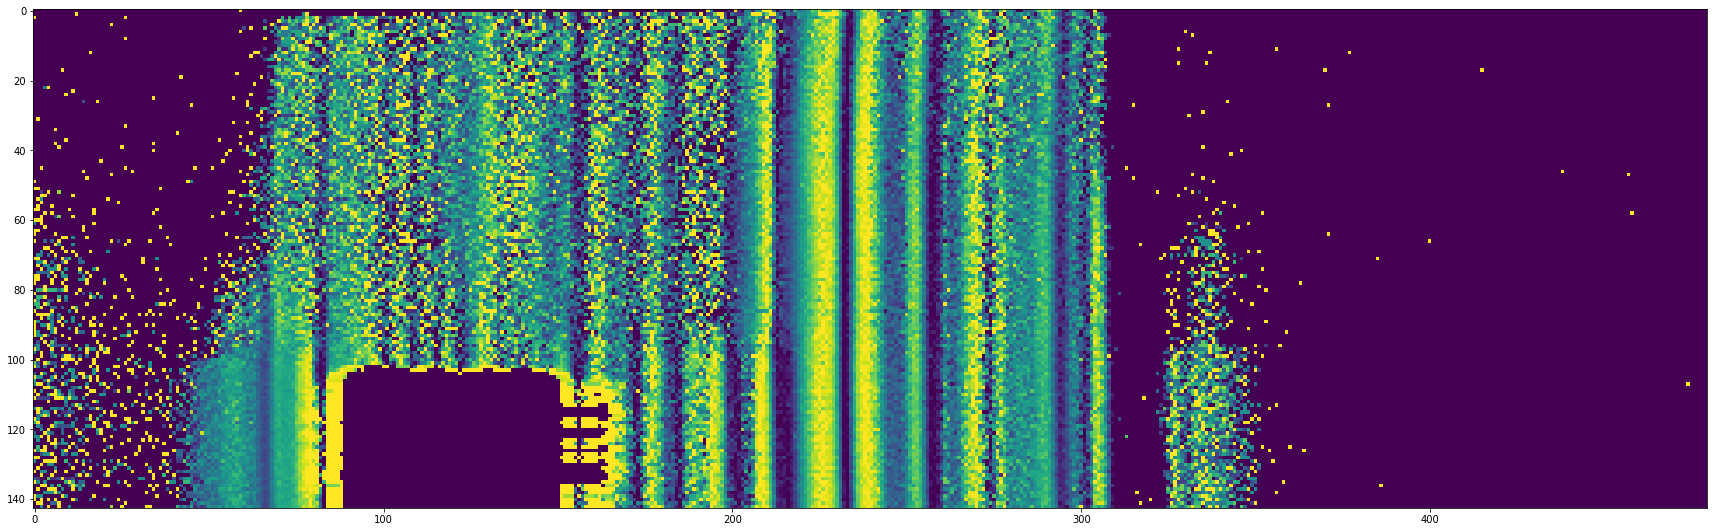

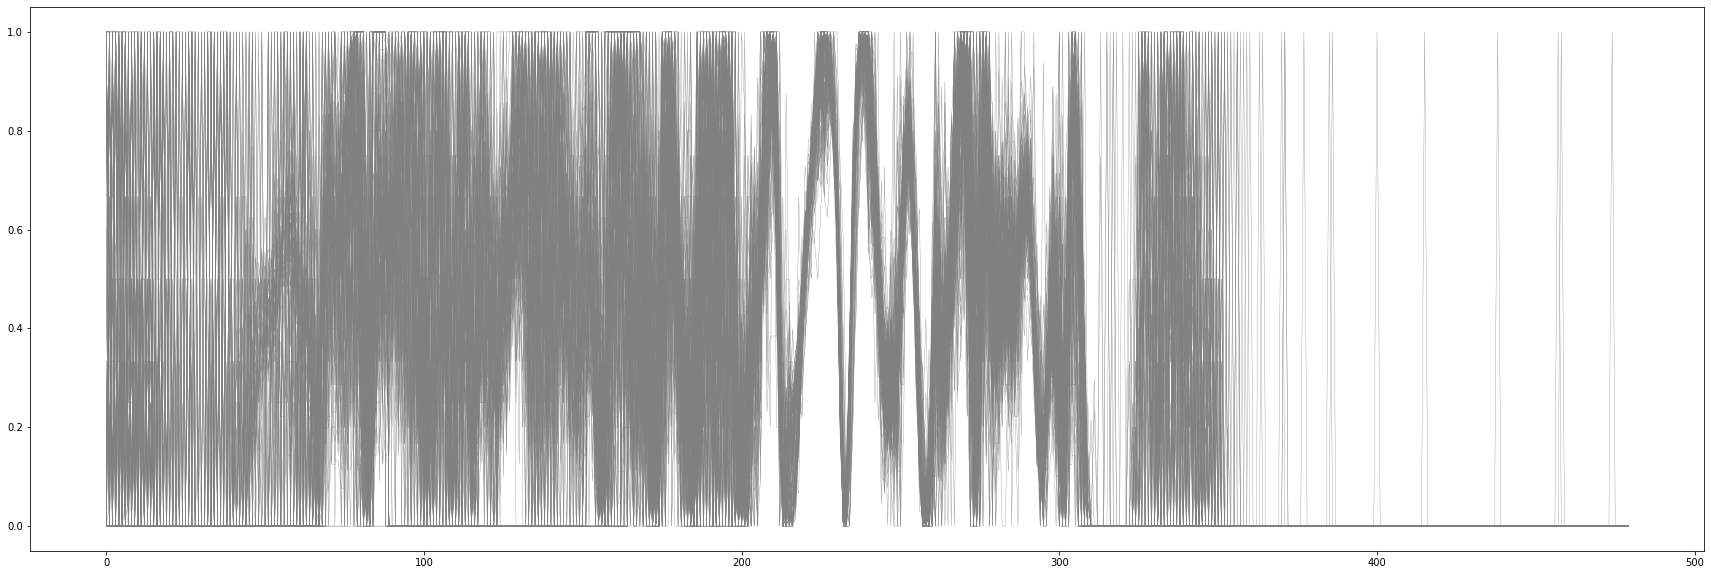

In [219]:
plt.figure(figsize = (30,10))
plt.imshow(image)
plt.figure(figsize = (30,10))
plt.imshow(locallyNormalizedIamge(image))
shapes(locallyNormalizedIamge(image))

In [221]:
aimage = locallyNormalizedIamge(image)

(15, 143)

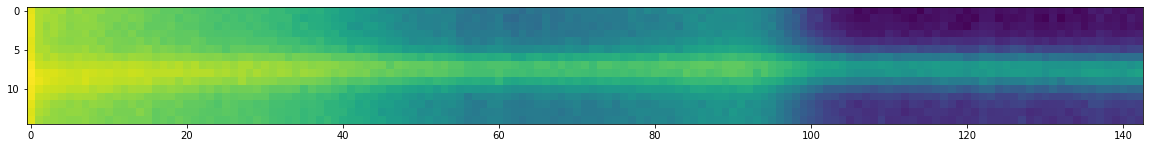

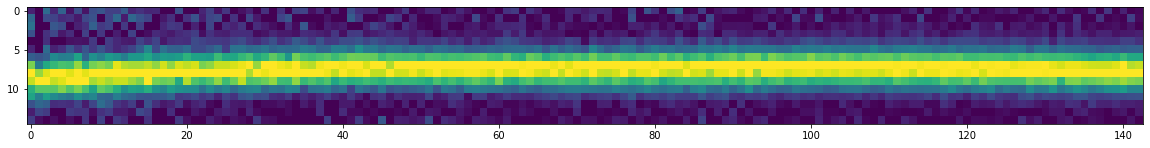

In [298]:
plt.figure(figsize = (20,5))
plt.imshow(1- image[:,225:240].T)
plt.figure(figsize = (20,5))
bimg = 1- aimage[:,225:240].T
plt.imshow(bimg)
bimg.shape

In [244]:
xx = np.arange(143)

In [361]:
def myFunction(xx1 = np.arange(143), t0123 = np.random.rand(4,1)/100000):
    xx0123 = np.zeros((xx1.shape[0], t0123.shape[0]))
    xx0123[:,0] = 0
    xx0123[:,1] = xx1
    for i in range(2, t0123.shape[0]):
        xx0123[:,i] = xx0123[:,i-1] * xx1
    return np.matmul(xx0123, t0123)


In [362]:
x = myFunction()
x.shape

(143, 1)

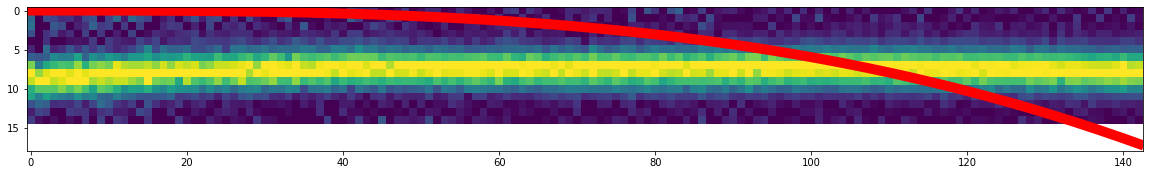

In [363]:
plt.figure(figsize = (20,5))
plt.imshow(1- aimage[:,225:240].T)
t0123 = np.random.rand(4,1)/100000
currentCurve = myFunction(t0123 = t0123)
plt.plot(np.arange(143), currentCurve, 'r', linewidth = 10)

In [568]:
# X = np.zeros((4,143))
# X[0,:] = 1
# X[1,:] = np.arange(143)
# X[2,:] = X[1,:] * X[1,:]
# X[3,:] = X[2,:] * X[1,:]

X = np.zeros((4,143))
X[0,:] = 1
X[1,:] = np.arange(143)#/143
X[2,:] = np.arange(143) * np.arange(143)#/143 / 143 
X[3,:] = np.arange(143) * np.arange(143) * np.arange(143)#/143/ 143/143 

Y = bimg



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(np.swapaxes(X,0,1)))
# StandardScaler()
XX = scaler.transform(np.swapaxes(X,0,1))
X = np.swapaxes(XX,0,1)
X[0,:] = 1



def HROW(Xval, theta):
    return np.matmul(theta.T, Xval)

def someStrangeFUnction(Xval, theta, Yval):
    L = np.zeros((Yval.shape[0], Yval.shape[1]))
    L[:,:] = np.arange(Yval.shape[0]).reshape(Yval.shape[0], 1)
    return np.sum((HROW(Xval, theta)-L) * Yval * Yval)

def probing_cost(Xval, theta, Yval):
    L = np.zeros((Yval.shape[0], Yval.shape[1]))
    L[:,:] = np.arange(Yval.shape[0]).reshape(Yval.shape[0], 1)
    return np.sum(((HROW(Xval, theta)-L) * Yval)**2)

StandardScaler()


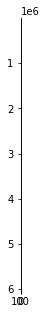

[  1.83 -32.82 -20.76 -14.62] 2189733.395137151
[21.03 42.78 28.2  24.45] 4354360.609771244
[ -24.09 -132.37  -86.84  -67.41] 38905838.81629296
[ 81.98 273.41 183.48 148.58] 174214186.8580438
[-167.43 -666.68 -451.61 -359.35] 1036210904.9726181
[ 419.14 1511.21 1040.29  835.3 ] 5448208615.166567
[ -960.6  -3534.03 -2463.93 -1974.92] 30190507695.68416
[2285.42 8152.97 5765.86 4636.52] 163577094631.15918
[ -5352.62 -18917.38 -13559.64 -10919.56] 894886991517.256
[12623.11 43779.98 31815.13 25686.06] 4875562528589.6
[ -29688.85 -101419.12  -74706.25  -60459.64] 26609833213687.25
[ 69922.75 234807.57 175325.26 142286.25] 145116437108113.2
[-164621.67 -543673.69 -411467.99 -334910.6 ] 791603877944263.0
[ 387718.6  1258537.78  965438.69  788308.4 ] 4317238504483895.0
[ -913207.61 -2913022.9  -2264909.64 -1855603.15] 2.354438085567267e+16
[2151301.2  6741258.36 5312414.44 4367961.09] 1.2838221278538046e+17
[ -5068565.74 -15597700.51 -12458101.35 -10281960.07] 6.999455035514578e+17
[11943435.9

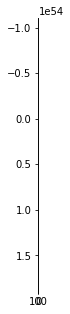

In [569]:
plt.figure(figsize = (20,5))
plt.imshow(1- aimage[:,225:240].T)
#t0123 = np.zeros((4,1))#np.random.rand(4,1)/100000
t0123 = np.random.rand(4,1)
t0123[0,0] = 10
t0123[1,0] = -0.19
t0123[2,0] = .078
t0123[3,0] = 2
currentCurve = myFunction(t0123 = t0123)
plt.plot(np.arange(143), currentCurve, 'r', linewidth = 10)
plt.show()

alpha = 1/ 143
for i in range(143):
    for j in range(4):
        t0123[j,0] = t0123[j,0]  - alpha * someStrangeFUnction(X, t0123, Y) * X[j,i]#(i**j)
    print(t0123[:,0], probing_cost(X, t0123, Y))
#     plt.figure(figsize = (20,5))
#     plt.imshow(Y)
    currentCurve = HROW(X,t0123)
#     print(currentCurve)
#     plt.plot(np.arange(143), currentCurve[0,:], 'orange', linewidth = 4)
#     plt.show()

plt.figure(figsize = (20,5))
plt.imshow(Y)
plt.plot(np.arange(5,143), currentCurve[0,5:], 'orange', linewidth = 4)
plt.show()


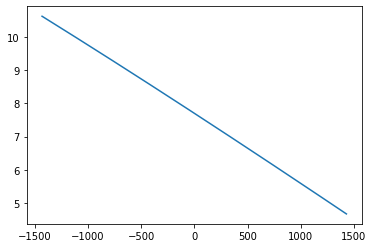

In [511]:
plt.plot(tmpx, 7.70 -2.98E-1*tmpx/143 -5.62E-4*tmpx*tmpx/143/143 + 7.08E-06*tmpx*tmpx*tmpx/143/143/143)

In [506]:
tmpx = np.arange(-1430,1430)

In [577]:
X = np.zeros((4,143))
X[0,:] = 1
X[1,:] = np.arange(143)#/143
X[2,:] = np.arange(143) * np.arange(143)#/143 / 143 
X[3,:] = np.arange(143) * np.arange(143) * np.arange(143)#/143/ 143/143 


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(np.swapaxes(X)))
# StandardScaler()
XX = scaler.transform(np.swapaxes(X))

XX[0,:] = 1


TypeError: _swapaxes_dispatcher() missing 2 required positional arguments: 'axis1' and 'axis2'

In [578]:
XX

array([[ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
         1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
      

In [447]:
HROW(X, t0123) - L

array([[ 9.5 ,  9.48,  9.47, ...,  7.4 ,  7.38,  7.37],
       [ 8.5 ,  8.48,  8.47, ...,  6.4 ,  6.38,  6.37],
       [ 7.5 ,  7.48,  7.47, ...,  5.4 ,  5.38,  5.37],
       ...,
       [-2.5 , -2.52, -2.53, ..., -4.6 , -4.62, -4.63],
       [-3.5 , -3.52, -3.53, ..., -5.6 , -5.62, -5.63],
       [-4.5 , -4.52, -4.53, ..., -6.6 , -6.62, -6.63]])

1623.7176503311935

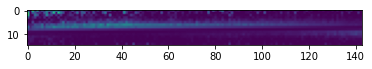

In [448]:
plt.imshow((HROW(X, t0123) - L) ** 2 * Y *Y)
np.sum(((HROW(X, t0123) - L) ** 2 * Y *Y))

In [432]:
(HROW(X, t0123) - L) ** 2 * Y

array([[ 7.36,  0.  , 28.16, ...,  4.41,  0.  ,  0.91],
       [21.33,  0.  , 14.12, ...,  0.  ,  6.38,  0.82],
       [18.38,  0.  ,  0.  , ...,  0.34,  1.38,  0.  ],
       ...,
       [ 2.25,  3.03,  2.79, ...,  2.28,  2.41,  2.05],
       [ 1.33,  3.36,  2.82, ...,  2.33,  0.43,  2.51],
       [ 4.55,  1.05,  0.  , ...,  0.  ,  2.89,  0.  ]])

4.0

In [455]:
15**0

1

In [183]:
img[237:380,225:240]/ np.max(img[237:380,225:240], axis = 1).reshape(143,1)

Array([[0.94, 0.89, 0.89, ..., 0.94, 1.  , 0.97],
       [0.93, 0.93, 0.93, ..., 0.87, 0.93, 1.  ],
       [0.88, 0.93, 1.  , ..., 0.88, 0.93, 1.  ],
       ...,
       [0.98, 1.  , 1.  , ..., 0.86, 0.87, 0.89],
       [1.  , 0.97, 0.98, ..., 0.86, 0.89, 0.88],
       [1.  , 1.  , 1.  , ..., 0.87, 0.87, 0.9 ]])

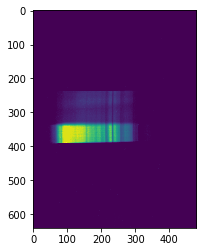

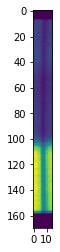

In [143]:
shotsIndex = 60
img = np.rot90(imageio.imread(sf.shots[shotsIndex].fnameBMP_8Exposure[0]), k = 3)
plt.imshow(img)
plt.show()
plt.imshow(img[230:400,225:240])
plt.show()

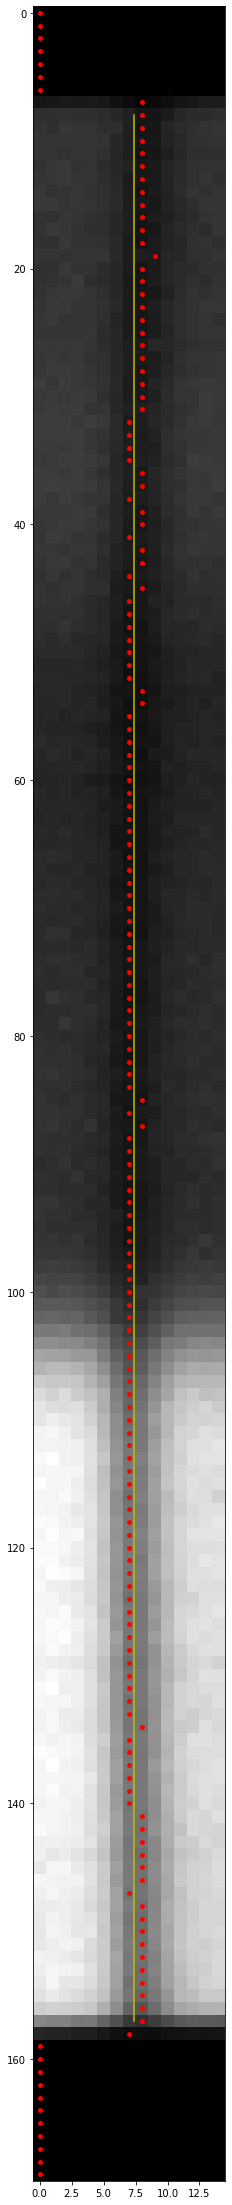

In [144]:
plt.figure(figsize = (10,40))
x= np.argmin(img[230:400,225:240], axis = 1) #+225
plt.imshow(img[230:400,225:240], cmap = 'gray')
plt.scatter(x, range(400-230), color = "r",marker='o', s = 15)
plt.plot([np.mean(x[8:157]), np.mean(x[8:157])],[8,157], c = 'y')

In [145]:
x.shape

(170,)

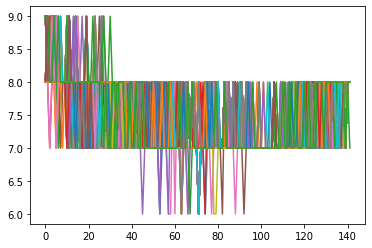

In [87]:
tmp = np.zeros((325-2, 142))
for shotsIndex in range(2,325):
    img = np.rot90(imageio.imread(sf.shots[shotsIndex].fnameBMP_8Exposure[0]), k = 3)
    x = np.argmin(img[230:400,225:240], axis = 1) #+225
        #     tmp.append(x)
    plt.plot(x[8:150])
    tmp[shotsIndex-2, : ] = x[8:150]
#     plt.show()


In [83]:
a = np.mean(tmp, axis = 0)

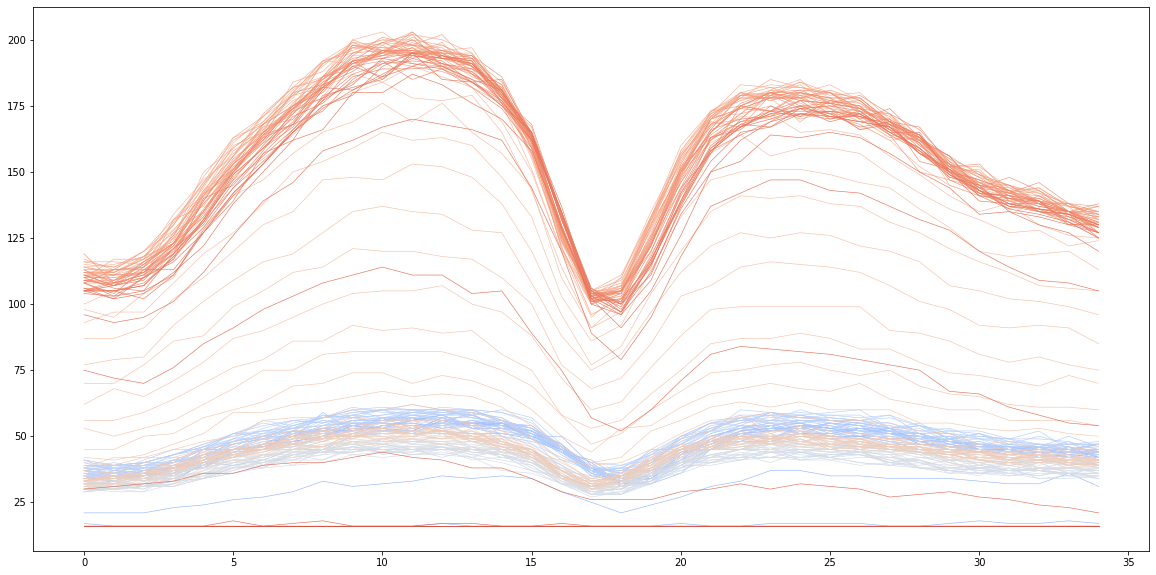

In [140]:
plt.figure(figsize = (20,10))
img[230:400,225:240]
for i in range(230,400):
    plt.plot(img[i, 225-10:240+10], c = cmap(i-170), linewidth = .6)

In [132]:
cmap=plt.cm.get_cmap('coolwarm')

In [133]:
cmap(1)

(0.23437707945098038, 0.3055417303294118, 0.7596795275882353, 1.0)

In [137]:
cmap(255)

(0.705673158, 0.01555616, 0.150232812, 1.0)